In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

### Data

In [9]:
ais = pd.read_csv('./data/aisles.csv')
prod = pd.read_csv('./data/products.csv')
dept = pd.read_csv('./data/departments.csv')
prd_map = products[['product_id','product_name']].set_index('product_id').to_dict()['product_name']
print(ais.head(2))
print(dept.head(2))
print(prod.head(2))
# Identify previous orders with columns reordered
ord_prd = pd.read_csv('./data/order_products__prior.csv')
ord_prd.head(3)
# 'order_dow' is the day of week
orders = pd.read_csv('./data/orders.csv')
orders.sample(3)

   aisle_id                  aisle
0         1  prepared soups salads
1         2      specialty cheeses
   department_id department
0              1     frozen
1              2      other
   product_id                product_name  aisle_id  department_id
0           1  Chocolate Sandwich Cookies        61             19
1           2            All-Seasons Salt       104             13


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2387460,1993975,143683,prior,51,3,15,0.0
2352475,1904474,141617,prior,36,0,12,8.0
1708645,3062462,102585,prior,27,6,13,14.0


### PRD

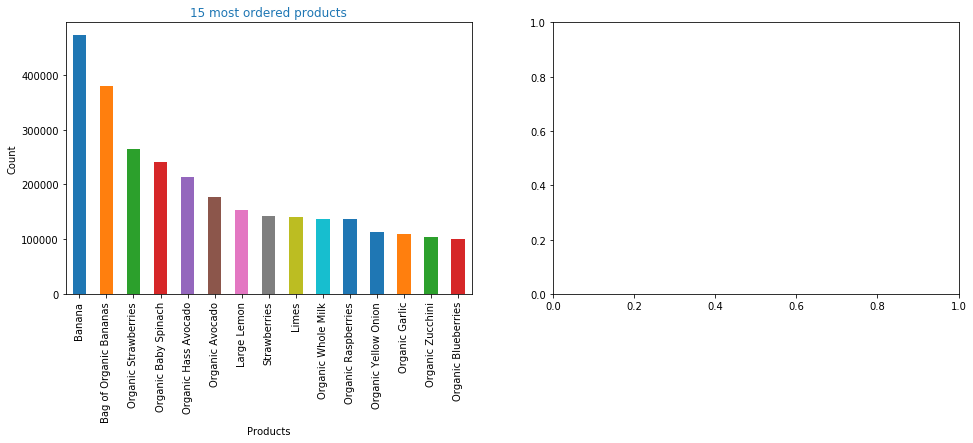

In [19]:
def clear_xtick(tick):
    t = int(tick)
    if t % 2 ==0:
        return ''
    else:
        return t

f, ax = plt.subplots(figsize=(16,5), ncols=2)
top_k = 15
ord_prd.product_id.value_counts()[:top_k].plot('bar', ax=ax[0])
_ = ax[0].set_title('%s most ordered products' % top_k, color='C0')
_ = ax[0].set_xlabel('Products')
_ = ax[0].set_ylabel('Count')
_ = ax[0].set_xticklabels([product_mapping[int(k.get_text())] for k in ax[0].get_xticklabels()])



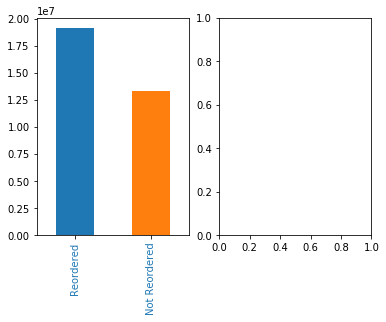

In [16]:
f, ax = plt.subplots(ncols=2)
_ = order_products.reordered.value_counts().plot('bar', ax =ax[0])
_ = ax[0].set_xticklabels([{0:'Not Reordered', 1: 'Reordered'}.get(int(k.get_text())) for k in ax[0].get_xticklabels()],color='C0')

### Orders distribution 

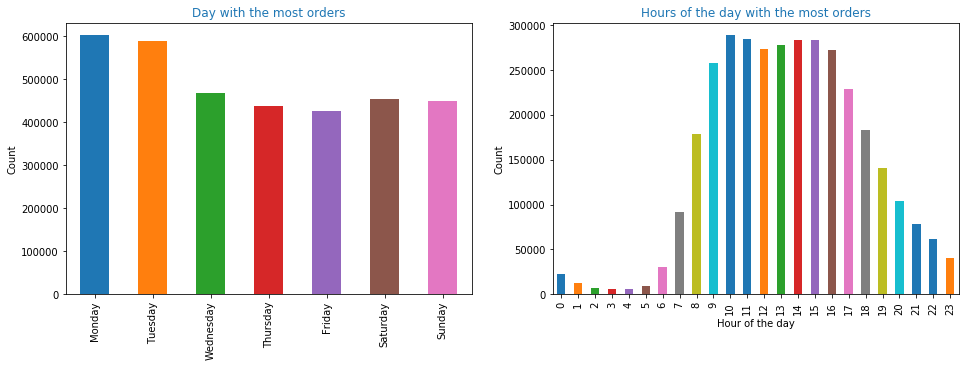

In [12]:
f, ax = plt.subplots(figsize=(16,5), ncols=2)
top_k = 15
orders.order_dow.value_counts().sort_index().plot('bar', ax=ax[0])
_ = ax[0].set_title('Day with the most orders',color='C0')
_ = ax[0].set_ylabel('Count')
_ = ax[0].set_xticklabels([calendar.day_name[int(k.get_text())] for k in ax[0].get_xticklabels()])

orders.order_hour_of_day.value_counts().sort_index().plot('bar', ax=ax[1])
_ = ax[1].set_title('Hours of the day with the most orders',color='C0')
_ = ax[1].set_xlabel('Hour of the day')
_ = ax[1].set_ylabel('Count')

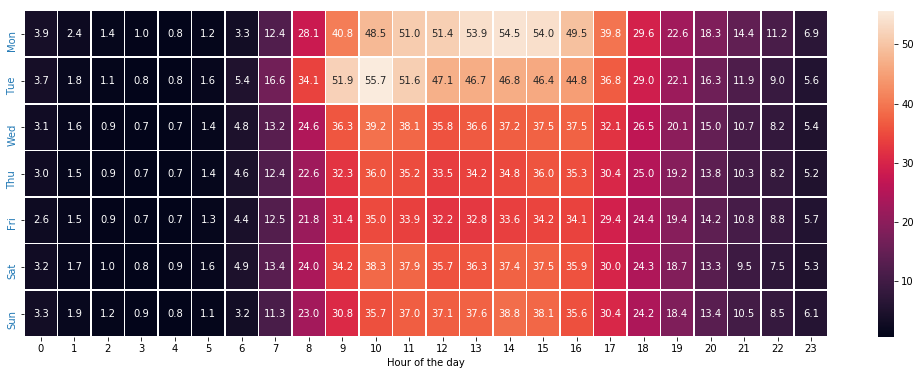

In [11]:
f, ax = plt.subplots(figsize=(18,6))
d = orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id', aggfunc=lambda x:round(len(x)*0.001,2)).fillna(0)
f = sns.heatmap(d, annot=True, fmt="1.1f", linewidths=.5, ax=ax) 
_ = ax.set_yticklabels([calendar.day_name[int(k.get_text())][:3] for k in ax.get_yticklabels()], color='C0')
_ = ax.set_ylabel('')
_ = ax.set_xlabel('Hour of the day')


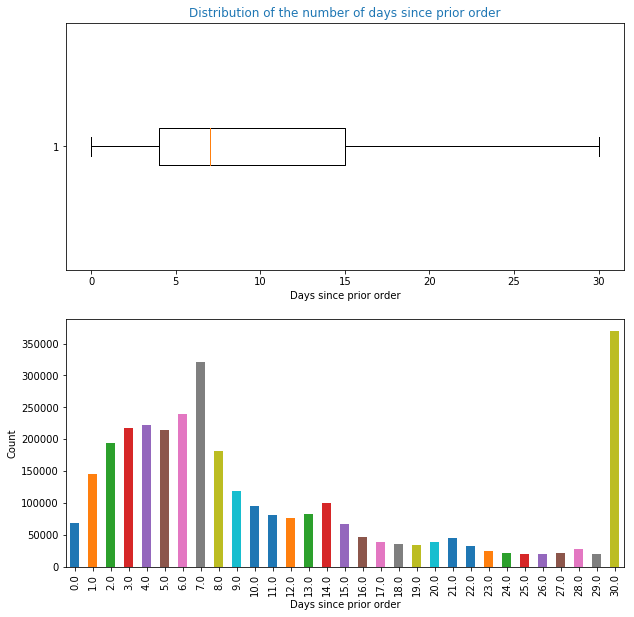

In [17]:
f, ax = plt.subplots(figsize=(10,10), nrows=2)
_ = ax[0].boxplot(list(orders.days_since_prior_order.dropna()), 0, 'rs', 0)
_ = ax[0].set_xlabel('Days since prior order')
_ = ax[0].set_title('Distribution of the number of days since prior order',color='C0')

orders.days_since_prior_order.value_counts().sort_index().plot('bar', ax=ax[1])
_ = ax[1].set_xlabel('Days since prior order')
_ = ax[1].set_ylabel('Count')

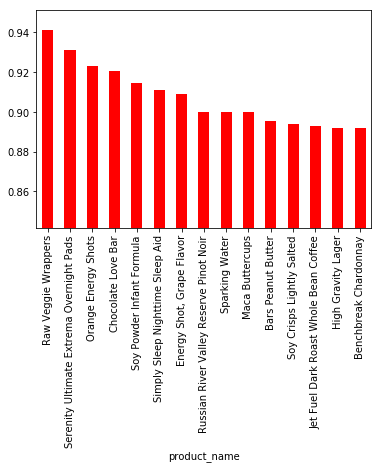

In [18]:
reord = order_products.groupby('product_id').agg({'order_id':'count', 'reordered':"mean"})
reord = pd.merge(reord, products, right_on='product_id', left_index=True).sort_values('reordered', ascending=False)
reord[:15].set_index('product_name')['reordered'].plot('bar',color='red')
_ = plt.ylim([reord[:15].reordered.min()- 0.05, reord[:15].reordered.max()+0.01])

In [20]:
prod_id_col = ord_prd.groupby('order_id').count()['product_id']
prod_id_col.value_counts().sort_index()[:60].plot('bar', ax=ax[1])
_ = ax[1].set_title('Repartition of the number products- per order')
_ = ax[1].set_xlabel('# of products per order')
_ = ax[1].set_ylabel('Count')
_ = ax[1].set_xticklabels([clear_xtick(k.get_text()) for k in ax[1].get_xticklabels()])
print('Mean # of products -per order : %d' % prod_id_col.mean())

Mean # of products -per order : 10
